In [16]:
import numpy as np
from sklearn.datasets import fetch_openml
from scipy.fft import fft
from scipy.fft import ifft
from scipy.linalg import inv
from scipy.linalg import pinv
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import math
from tqdm import tqdm
from sklearn.metrics.pairwise import cosine_similarity

In [17]:
import lib.python.lib_FHRR_Loihi as lib
import lib.python.utility as util
from lava.magma.core.run_configs import Loihi1SimCfg
from lava.magma.core.run_configs import Loihi2HwCfg
from lava.magma.core.run_conditions import RunSteps

In [33]:
# Load MNIST data
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
print(f'Size of the dataset: {len(X)}')

Size of the dataset: 70000


In [34]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# print(int(math.sqrt(len(X.loc[0])))
idx = 0
size_len = int( math.sqrt( len(X_train.loc[idx]) ) )
img = np.array(list(X_train.iloc[idx])).reshape(size_len,-1)

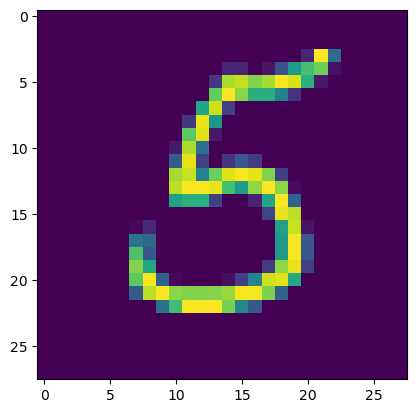

In [6]:
plt.imshow(img)
plt.show()

In [7]:
# Random projection to higher dimensional space
np.random.seed(42)
random_projection_matrix = np.random.randn(784, 1000)
X_train_projected = np.dot(X_train, random_projection_matrix)
X_test_projected  = np.dot(X_test, random_projection_matrix)

In [8]:
# Apply FFT to the projected data
X_train_fft = fft(X_train_projected)
X_test_fft = fft(X_test_projected)

## SNN Encode Decode

In [9]:
TIME_STEPS = 400
lib.GlobalVars.global_threshold = 100
lib.GlobalVars.time_steps = TIME_STEPS

sims = []
snn_decode = []

In [10]:
for i, vec in enumerate(tqdm(X_train_fft[:100])):
    encoder = lib.FHRR_Encoder(vec=vec)
    decoder = lib.FHRR_Decoder(dimension=vec.shape[0])
    encoder.spikes_out.connect(decoder.spikes_a_in)
    decoder.run(condition=RunSteps(num_steps=TIME_STEPS), run_cfg=Loihi1SimCfg())
    raw_rslt = decoder.get_decoded_value()
    rect_rslt = util.phase2complex_array(raw_rslt)

    snn_decode.append(rect_rslt)
    # Compute similarity
    similarity = util.similarity(rect_rslt, vec)

    sims.append(similarity)

100%|██████████| 100/100 [03:04<00:00,  1.84s/it]


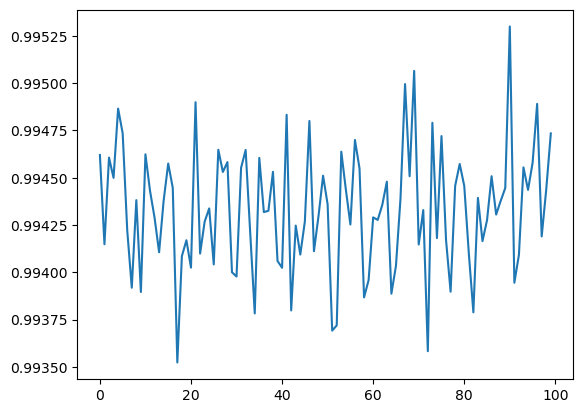

In [11]:
plt.plot(sims)
plt.show()

In [12]:
X_train_projected_recovered = ifft(np.array(snn_decode))

In [19]:
# X_train_projected = np.dot(X_train, random_projection_matrix)
X_train_recovered = np.dot(X_train_projected_recovered, pinv(random_projection_matrix))

In [20]:
# X_train_recovered

In [21]:
idx = 0
size_len = 28
img_rec = np.array(list(X_train_recovered[idx])).reshape(size_len,-1).real

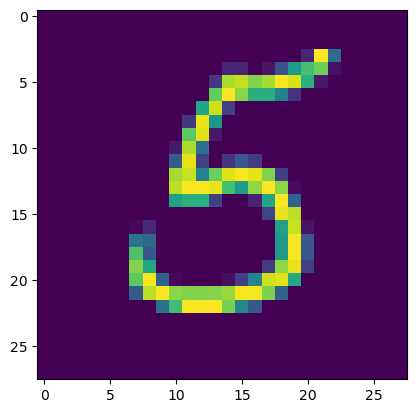

In [22]:
plt.imshow(img)
plt.show()

In [25]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and X_train_recovered are your lists of vectors
# Convert them to numpy arrays if they aren't already
X_train = np.array(X_train)
X_train_recovered_np = np.array([v.real for v in X_train_recovered])

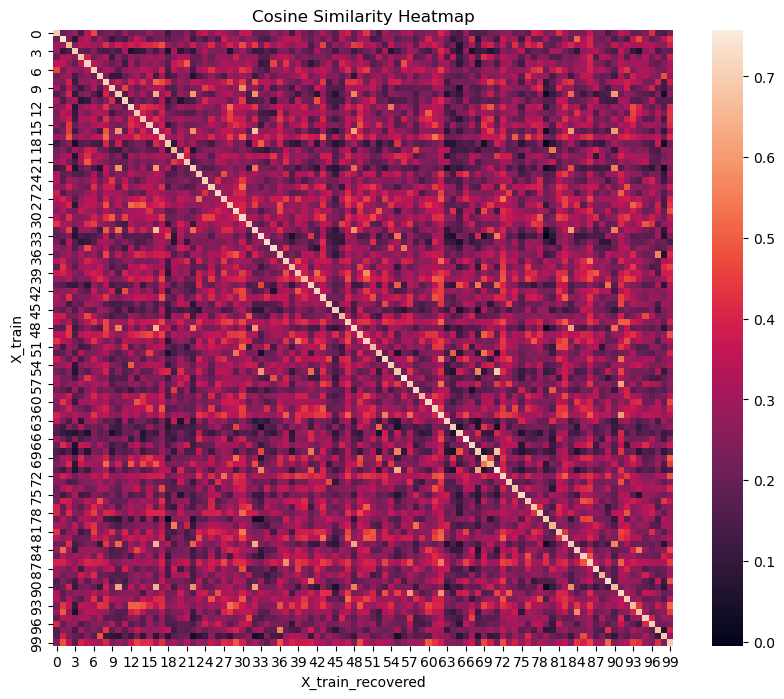

In [27]:
# Calculate the cosine similarity matrix
cos_sim_matrix = cosine_similarity(X_train[:100], X_train_recovered_np)

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cos_sim_matrix) #annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Cosine Similarity Heatmap')
plt.xlabel('X_train_recovered')
plt.ylabel('X_train')
plt.show()

In [29]:
sm = 0
cnt = 0
for i in range(100):
    sm += cos_sim_matrix[i,i]
    cnt += 1

In [30]:
print(sm / cnt)

0.7009414457580279


## One sample

In [35]:
idx = 1263

img_0_fft = fft(X_train.iloc[idx])
img_0_fft.shape

(784,)

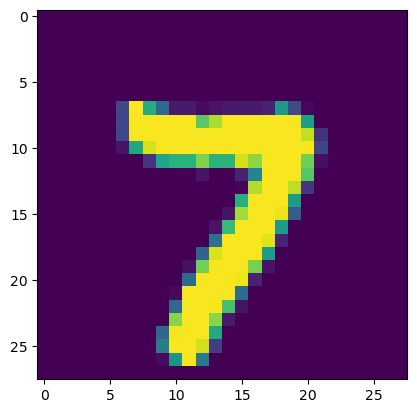

In [36]:
img = np.array(list(X_train.iloc[idx])).reshape(28,-1)
plt.imshow(img)
plt.show()

In [37]:
img_0_ifft = ifft(img_0_fft)
img_0_ifft.shape

(784,)

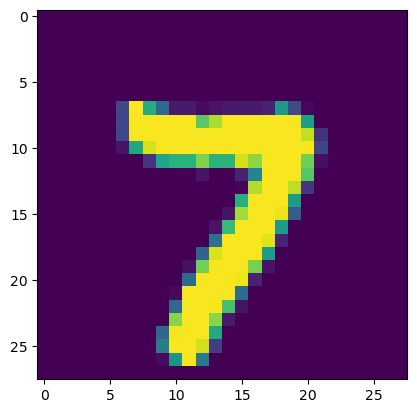

In [38]:
img = np.array(img_0_ifft).reshape(size_len,-1).real
plt.imshow(img)
plt.show()

In [4]:
import cmath

In [5]:
TIME_STEPS = 100
lib.GlobalVars.global_threshold = 50
lib.GlobalVars.time_steps = TIME_STEPS

In [61]:
error = 0.01
res = 0.0174533

In [62]:
lib.set_params_auto( error, res )

In [63]:
origianl_values = [147.80454435455158, 355.3373852407602, 52.01796568479602, 230.17693291101367, 305.3097317028597, 29.105325273002638, 282.2173698764598, 141.411458249962, 210.17884476564018, 279.77174435720974, 98.4698843269047, 100.9486338280419, 42.50053270495084, 33.4389950156113, 13.929519384743898, 155.13317347978602, 103.87564276787654, 283.3824624504846, 158.21139589917837, 169.91057225956067, 34.357232615469144, 188.8083582424108, 207.79525962660708, 277.66932341708235, 273.73722943400355, 328.91462182431593, 304.7285699132874, 71.41560627262889, 346.9982567964745, 331.02325726720903, 97.28815892538651, 124.66729008575192, 343.53475952541464, 292.08477494420913, 252.19370795231097, 287.29218408297896, 37.85239654538958, 83.1849753252203, 56.06972404741468, 100.02125068104063, 15.532477207609702, 204.6588759112656, 187.18901956637916, 227.7990677496464, 281.1439077430744, 337.62847901810295, 29.385127698465304, 124.9205060627447, 258.09936734396865, 232.9535596047484, 283.13183294420656, 224.4047580375722, 328.7760109224734, 298.5622817998264, 115.15307105335576, 235.24433787847687, 81.77335092448737, 321.8714452608747, 138.13384599283586, 194.49131646071265, 116.63407541251654, 157.28102695303676, 2.7287920900809315, 303.6984729909087, 39.240594599572695, 50.60863443411198, 145.9199765965488, 251.53586599781775, 273.7827412184306, 302.8868317392987, 326.2776938338677, 333.4915526525764, 184.5494864190472, 182.48788715754793, 224.8217151161212, 178.31882915950348, 263.15489180213524, 348.70636701409865, 30.901349911553652, 141.4073489152354, 155.31929875334578, 284.4791076561711, 99.82502722622394, 2.200191536081979, 162.16788901349202, 104.21353393204305, 322.55274299670685, 97.48116236661288, 344.1711820521316, 194.71349498730817, 5.910074456605829, 284.26407640558705, 316.9040487054545, 190.8355139599994, 254.60857796628872, 143.64612305323934, 313.1158717431587, 72.92590428063039, 358.4448608803876, 267.9313339080056]

angles_radians = [cmath.pi * angle / 180.0 for angle in origianl_values]

vec = np.array([cmath.exp(cmath.pi * 1j * angle / 180.0) for angle in origianl_values])
# print(vec)

In [64]:
# encoder = lib.FHRR_Encoder(vec=vec)
# decoder = lib.FHRR_Decoder(dimension=vec.shape[0])
# encoder.spikes_out.connect(decoder.spikes_a_in)
# decoder.run(condition=RunSteps(num_steps=TIME_STEPS), run_cfg=Loihi1SimCfg())
# raw_rslt = decoder.get_decoded_value()
# rect_rslt = util.phase2complex_array(raw_rslt)

encoder = lib.FHRR_Encoder(vec=vec)
encoder.vth = lib.GlobalVars.global_threshold
decoder = lib.FHRR_Decoder(dimension=vec.shape[0])
decoder.vth = lib.GlobalVars.global_threshold
encoder.spikes_out.connect(decoder.spikes_a_in)

decoder.run(condition=RunSteps(num_steps=lib.GlobalVars.time_steps), run_cfg=Loihi1SimCfg())
raw_rslt = decoder.get_decoded_value()
rect_rslt = util.phase2complex_array(raw_rslt)

In [65]:
import math

def radians_to_degrees(radians):
    """
    Convert radians to degrees, ensuring the result is within the range 0 to 360.

    Parameters:
    radians (float): The angle in radians.

    Returns:
    float: The angle in degrees, adjusted to be within 0 to 360.
    """
    # Convert radians to degrees
    degrees = radians * 180 / math.pi
    
    # Normalize the result to be within the range of 0 to 360
    degrees = degrees % 360

    return degrees

In [66]:
decoded = radians_to_degrees(raw_rslt)

In [67]:
def calculate_percentage_difference(original, decoded):
    """
    Calculate the percentage difference between original and decoded values.

    Parameters:
    original (np.array): Original values.
    decoded (np.array): Decoded values.

    Returns:
    np.array: Percentage differences.
    """
    return np.abs((np.array(original) - np.array(decoded)) / np.array(original)) * 100

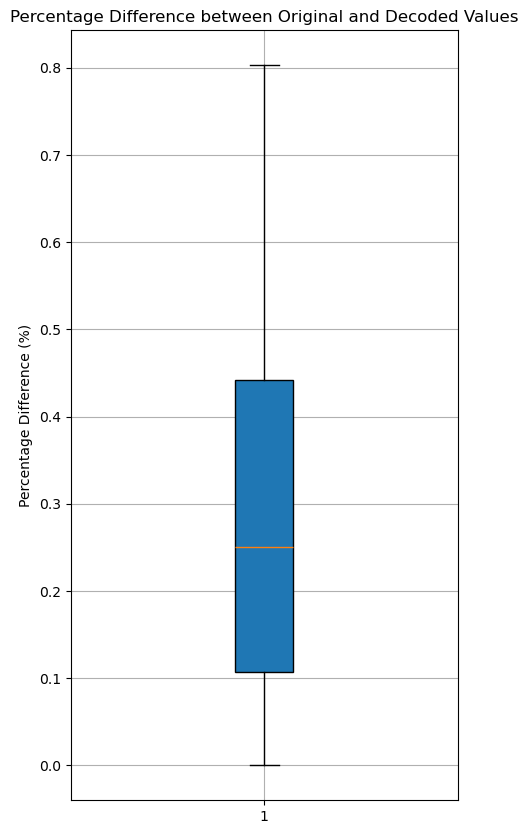

In [68]:
percentage_diff = calculate_percentage_difference(origianl_values, decoded)

# print("Original Values:", values)
# print("Decoded Values:", decoded_values)
# print("Percentage Differences:", percentage_diff)

# Plotting the percentage differences
plt.figure(figsize=(5, 10))
plt.boxplot(percentage_diff, vert=True, patch_artist=True)
plt.title("Percentage Difference between Original and Decoded Values")
plt.ylabel("Percentage Difference (%)")
plt.grid(True)
plt.show()

In [69]:
# for i in range(len(percentage_diff)):
#     print(f'{i} : {percentage_diff[i]}')

In [70]:
snn_brian2 = [137.14285714285714, 308.57142857142856, 8.571428571428571, 188.57142857142858, 317.1428571428571, 34.285714285714285, 162.85714285714286, 145.71428571428572, 231.42857142857144, 248.57142857142856, 111.42857142857143, 128.57142857142858, 60.0, 17.142857142857142, 25.71428571428571, 145.71428571428572, 120.0, 325.7142857142857, 102.85714285714285, 145.71428571428572, 60.0, 137.14285714285714, 248.57142857142856, 205.7142857142857, 180.0, 317.1428571428571, 334.2857142857143, 42.857142857142854, 360.0, 240.0, 111.42857142857143, 94.28571428571429, 308.57142857142856, 265.7142857142857, 222.85714285714286, 282.85714285714283, 77.14285714285714, 94.28571428571429, 68.57142857142857, 94.28571428571429, 8.571428571428571, 171.42857142857142, 145.71428571428572, 197.14285714285717, 205.7142857142857, 300.0, 42.857142857142854, 162.85714285714286, 120.0, 222.85714285714286, 282.85714285714283, 257.14285714285717, 222.85714285714286, 197.14285714285717, 111.42857142857143, 145.71428571428572, 42.857142857142854, 291.42857142857144, 102.85714285714285, 154.28571428571428, 60.0, 145.71428571428572, 0.0, 248.57142857142856, 34.285714285714285, 77.14285714285714, 180.0, 188.57142857142858, 325.7142857142857, 231.42857142857144, 282.85714285714283, 240.0, 214.28571428571428, 120.0, 188.57142857142858, 137.14285714285714, 231.42857142857144, 325.7142857142857, 42.857142857142854, 102.85714285714285, 102.85714285714285, 222.85714285714286, 111.42857142857143, 8.571428571428571, 111.42857142857143, 60.0, 291.42857142857144, 85.71428571428571, 300.0, 171.42857142857142, 0.0, 180.0, 274.2857142857143, 257.14285714285717, 214.28571428571428, 154.28571428571428, 240.0, 94.28571428571429, 342.85714285714283, 257.14285714285717]
snn_torch = [148.2605, 354.8824,  55.6369, 230.1968, 305.0082,  30.6998, 283.6335,
        144.6981, 212.3845, 280.0710, 101.9487, 101.9487,  44.9496,  37.8247,
         16.4500, 155.3854, 105.5111, 283.6335, 158.9478, 173.1976,  37.8247,
        191.0099, 208.8221, 280.0710, 272.9461, 329.9453, 305.0082,  73.4491,
        347.7575, 329.9453,  98.3863, 126.8858, 344.1951, 294.3208, 251.5715,
        287.1959,  41.3871,  87.6989,  59.1993, 101.9487,  20.0124, 205.2596,
        187.4474, 230.1968, 283.6335, 337.0702,  34.2622, 126.8858, 258.6964,
        233.7592, 283.6335, 226.6343, 329.9453, 297.8833, 116.1985, 237.3217,
         84.1365, 322.8204, 141.1356, 194.5723, 119.7609, 158.9478,   9.3251,
        305.0082,  41.3871,  52.0744, 148.2605, 251.5715, 272.9461, 305.0082,
        326.3828, 333.5077, 187.4474, 183.8850, 226.6343, 180.3225, 265.8213,
        347.7575,  34.2622, 144.6981, 158.9478, 283.6335, 101.9487,   9.3251,
        162.5103, 105.5111, 322.8204,  98.3863, 344.1951, 194.5723,   9.3251,
        283.6335, 315.6955, 191.0099, 255.1339, 144.6981, 312.1331,  77.0116,
        358.4449, 269.3837]

In [71]:
percentage_diff_torch = calculate_percentage_difference(origianl_values, snn_torch)
percentage_diff_brian = calculate_percentage_difference(origianl_values, snn_brian2)

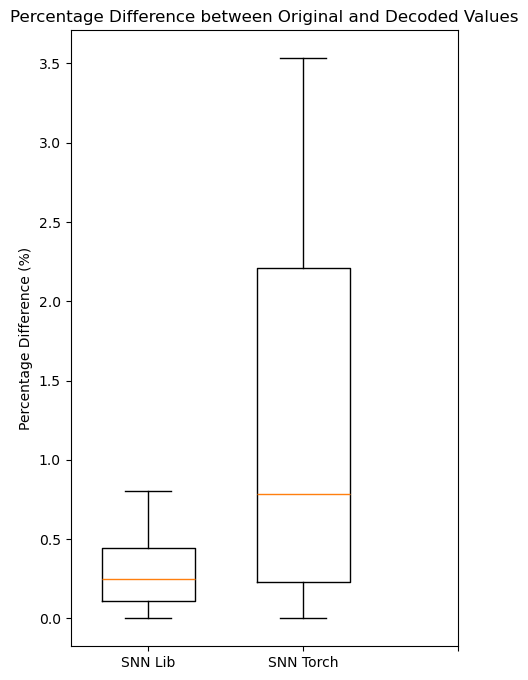

In [72]:
fig, ax = plt.subplots(figsize=(5, 8)) 

# Plot multiple box plots on the same axes
ax.boxplot([percentage_diff, percentage_diff_torch], positions=[1, 2], widths=0.6, showfliers=False)

# Adding labels
ax.set_xticklabels(['SNN Lib', 'SNN Torch'])
ax.set_xticks([1, 2, 3])
plt.title("Percentage Difference between Original and Decoded Values")
plt.ylabel("Percentage Difference (%)")

plt.show()